In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
%matplotlib inline
sns.set()

In [27]:
plt.style.use('fivethirtyeight')
cust_color = ['#c9d2c7',
'#b6caba',
'#a3beae',
'#90b1a1',
'#7da495',
'#6a9788',
'#578b7c',
'#448f6f',
'#318362',
'#1e7756',
'#0b6a49',
'#076340',
'#095c3b', '#0c5736', '#0e5232', '#114e2d', '#354236']
plt.rcParams['figure.figsize'] = (24,10)

In [5]:
df = pd.read_csv('games.csv')

In [6]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
last_move_at,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


In [10]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [14]:
df["avg_rating"] = (df["black_rating"] + df["white_rating"])/2
df["avg_rating"].max(),df["avg_rating"].min()

(2475.5, 816.5)

In [15]:
df[['white_rating','black_rating','avg_rating']]

,white_rating,black_rating,avg_rating
0,1500,1191,1345.5
1,1322,1261,1291.5
2,1496,1500,1498.0
3,1439,1454,1446.5
4,1523,1469,1496.0
...,...,...,...
20053,1691,1220,1455.5
20054,1233,1196,1214.5
20055,1219,1286,1252.5
20056,1360,1227,1293.5


In [16]:
def brackets(x):
    n=900
    while n<2600:
        if x <=n:
            return f"{n-100} - {n}"
        n += 100

df["rating_bracket"] = df["avg_rating"].apply(brackets)

In [17]:
df["rating_bracket"].value_counts()


rating_bracket
1500 - 1600    3073
1400 - 1500    3008
1600 - 1700    2525
1300 - 1400    2290
1700 - 1800    2141
1800 - 1900    1770
1200 - 1300    1392
1900 - 2000    1193
1100 - 1200     789
2000 - 2100     784
2100 - 2200     439
1000 - 1100     291
2200 - 2300     187
900 - 1000       83
2300 - 2400      72
2400 - 2500      11
800 - 900        10
Name: count, dtype: int64

In [18]:
df["rating_bracket"].replace("800 - 900", "900 - 1000", inplace = True)
df["rating_bracket"].replace("900 - 1000", "1000 -", inplace = True)
df["rating_bracket"].replace("2400 - 2500", "2300 - 2400", inplace = True)
df["rating_bracket"].replace("2300 - 2400", "2300 +", inplace = True)

C:\Users\irink\AppData\Local\Temp\ipykernel_12372\2973418195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating_bracket"].replace("800 - 900", "900 - 1000", inplace = True)
C:\Users\irink\AppData\Local\Temp\ipykernel_12372\2973418195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [19]:
df["rating_bracket"].value_counts()

rating_bracket
1500 - 1600    3073
1400 - 1500    3008
1600 - 1700    2525
1300 - 1400    2290
1700 - 1800    2141
1800 - 1900    1770
1200 - 1300    1392
1900 - 2000    1193
1100 - 1200     789
2000 - 2100     784
2100 - 2200     439
1000 - 1100     291
2200 - 2300     187
1000 -           93
2300 +           83
Name: count, dtype: int64

C:\Users\irink\AppData\Local\Temp\ipykernel_12372\2260054057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df["rating_bracket"].value_counts().index, y=df["rating_bracket"].value_counts().values,
C:\Users\irink\AppData\Local\Temp\ipykernel_12372\2260054057.py:1: UserWarning: The palette list has more values (17) than needed (15), which may not be intended.
  sns.barplot(x = df["rating_bracket"].value_counts().index, y=df["rating_bracket"].value_counts().values,


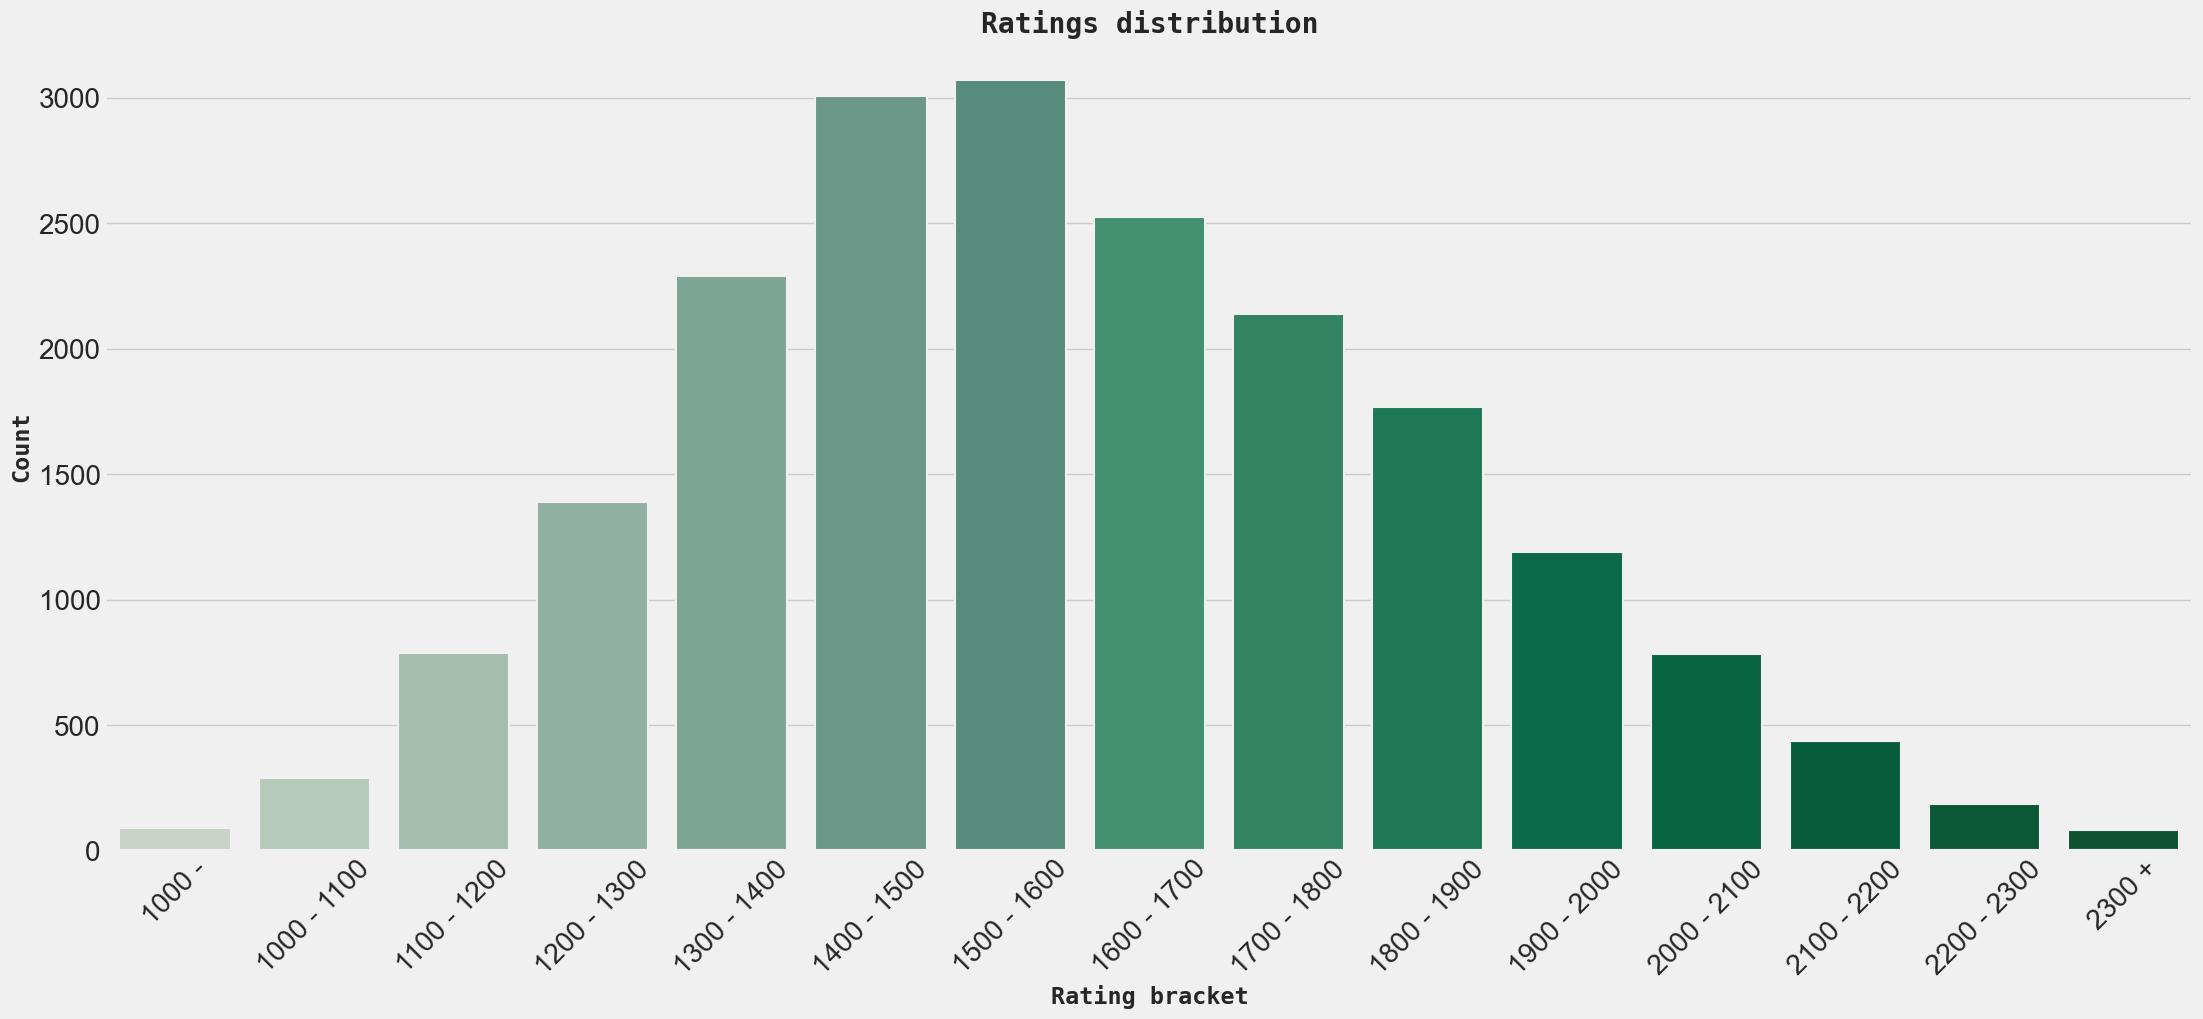

In [29]:
sns.barplot(x = df["rating_bracket"].value_counts().index, y=df["rating_bracket"].value_counts().values,  
            palette=cust_color, linewidth=1.5, saturation=1.5, order = sorted(set(df["rating_bracket"])))

plt.title('Ratings distribution', fontname = 'monospace', weight='bold')
plt.xlabel("Rating bracket", fontname = 'monospace', weight='semibold')
plt.ylabel("Count", fontname = 'monospace', weight='semibold')
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)
plt.show()

C:\Users\irink\AppData\Local\Temp\ipykernel_12372\311609534.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x = df.groupby("rating_bracket")["turns"].mean().index, y=df.groupby("rating_bracket")["turns"].mean(),
C:\Users\irink\AppData\Local\Temp\ipykernel_12372\311609534.py:1: UserWarning: The palette list has more values (17) than needed (15), which may not be intended.
  plots = sns.barplot(x = df.groupby("rating_bracket")["turns"].mean().index, y=df.groupby("rating_bracket")["turns"].mean(),


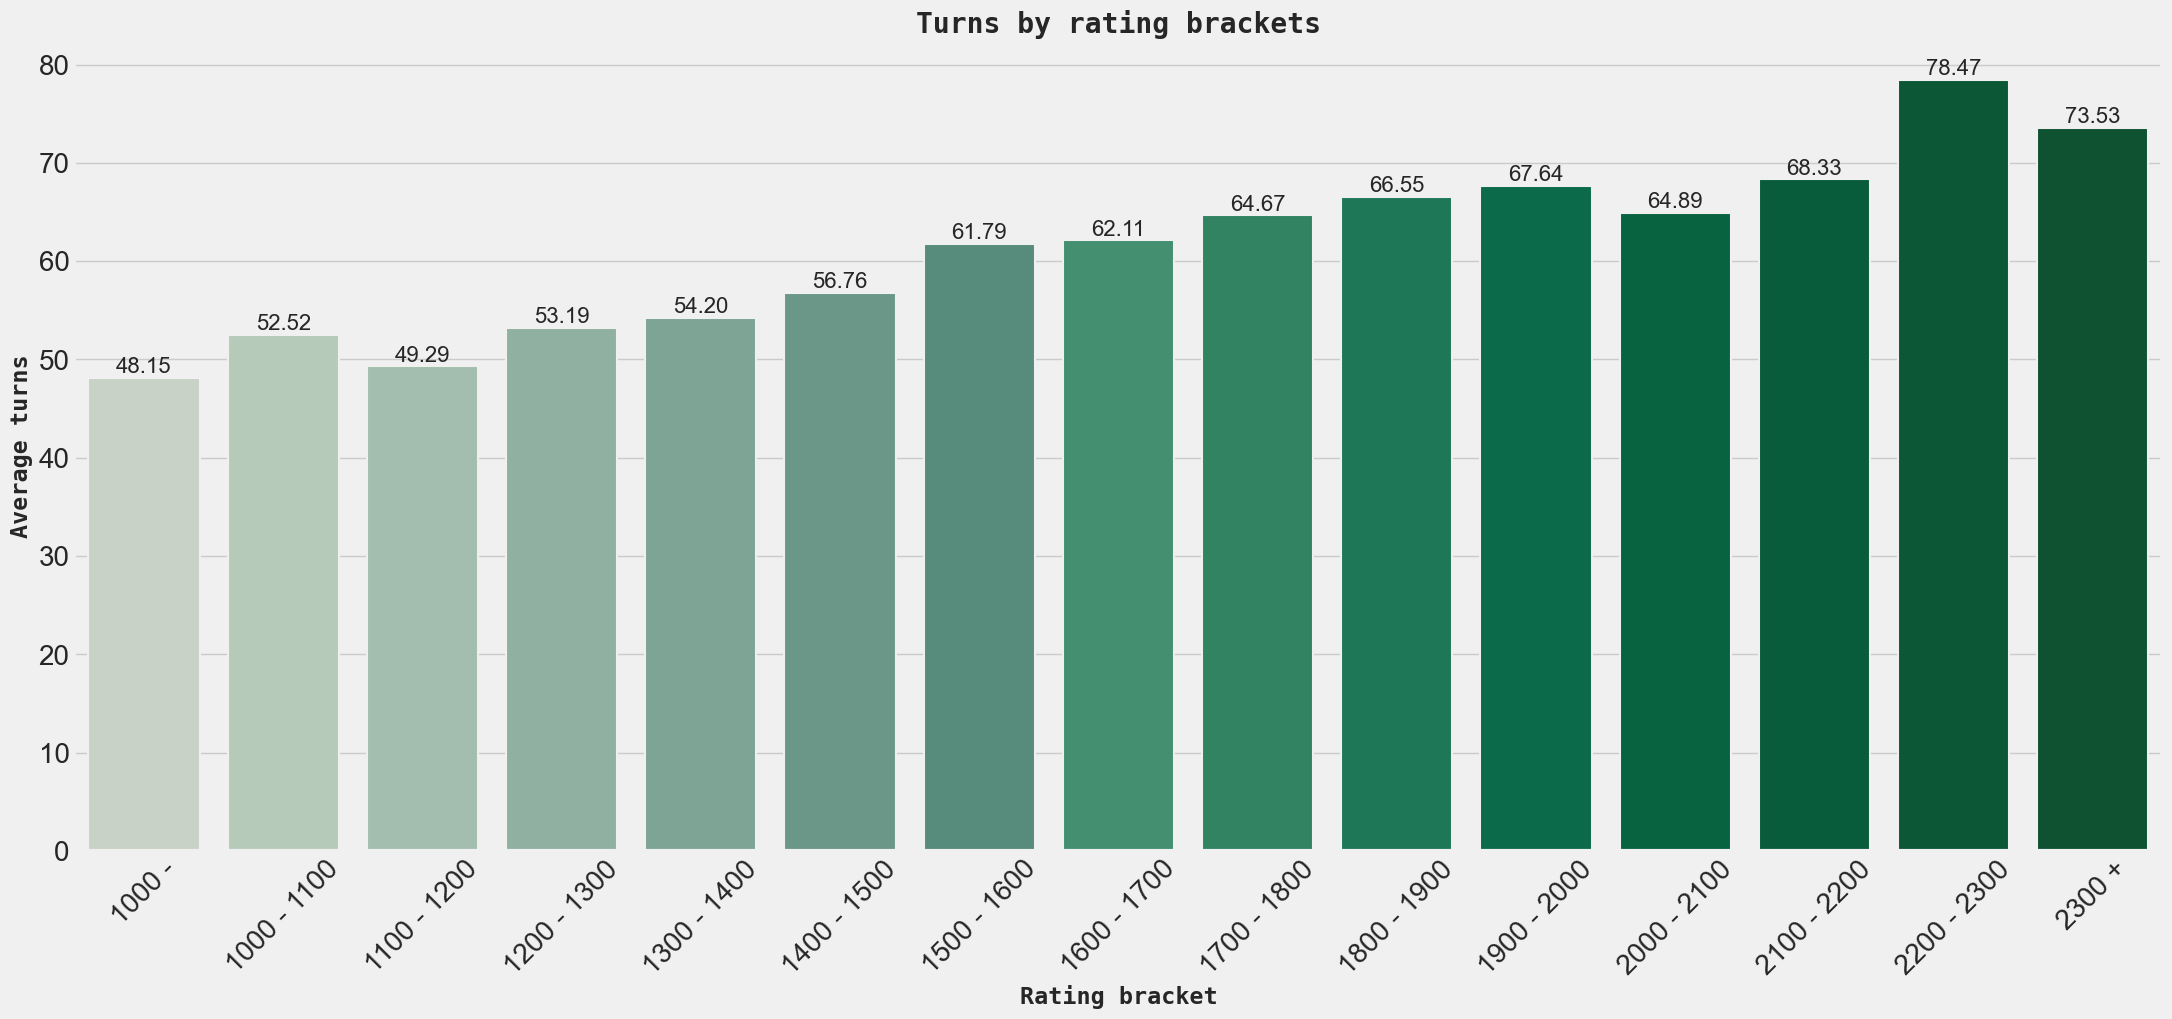

In [30]:
plots = sns.barplot(x = df.groupby("rating_bracket")["turns"].mean().index, y=df.groupby("rating_bracket")["turns"].mean(),  
            palette=cust_color, linewidth=1.5, saturation=1.5)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Turns by rating brackets', fontname = 'monospace', weight='bold')
plt.xlabel("Rating bracket", fontname = 'monospace', weight='semibold')
plt.xticks(fontsize=20, rotation = 45)
plt.ylabel("Average turns", fontname = 'monospace', weight='semibold')
plt.yticks(fontsize=20)
plt.show()

In [31]:
len(df["opening_name"].value_counts())

1477

In [32]:
openings = set(df["opening_name"])
for i in openings:
    print(i)

Bishop's Opening: Vienna Hybrid
Center Game: Kieseritzky Variation #2
Queen's Gambit Declined: Barmen Variation
Ruy Lopez: Morphy Defense |  Steinitz Deferred
Modern Defense: Norwegian Defense
Benko Gambit: Zaitsev System
Latvian Gambit Accepted |  Bilguer Variation
Nimzo-Larsen Attack: Modern Variation #2
Sicilian Defense: French Variation
Four Knights Game: Spanish Variation |  Rubinstein Variation
Zukertort Opening: The Walrus
King's Gambit Accepted |  Kieseritzky Gambit |  Kolisch Defense
Benoni Defense: Classical Variation
Modern Defense: Two Knights Variation
Center Game: Paulsen Attack Variation
Caro-Kann Defense: Classical Variation |  Flohr Variation
Gruenfeld Defense: Russian Variation |  Accelerated Variation
Benko Gambit
Ruy Lopez: Marshall Attack |  Modern Variation
Ruy Lopez: Exchange Variation |  Lutikov Variation
French Defense: Mediterranean Defense
English Opening: Symmetrical Variation
Danish Gambit Declined |  Sorensen Defense
Benoni Defense: King's Pawn Line
Nimzo-

In [33]:
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(":")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" |")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" #")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" Accepted")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" Declined")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" Refused")[0])

df["opening_name"].replace("King's Pawn Game", "King's Pawn", inplace = True)
df["opening_name"].replace("King's Pawn Opening", "King's Pawn", inplace = True)
df["opening_name"].replace("Old Indian Defense", "Old Indian", inplace = True)
df["opening_name"].replace("Queen's Pawn Game", "Queen's Pawn", inplace = True)
df["opening_name"].replace("Queen's Pawn Opening", "Queen's Pawn", inplace = True)
df["opening_name"].replace("Ware Defense", "Ware Opening", inplace = True)

C:\Users\irink\AppData\Local\Temp\ipykernel_12372\3261058310.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["opening_name"].replace("King's Pawn Game", "King's Pawn", inplace = True)
C:\Users\irink\AppData\Local\Temp\ipykernel_12372\3261058310.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [34]:
len(df["opening_name"].value_counts())


122

In [35]:
df2 = df.groupby("opening_name").filter(lambda x: len(x)>100)


In [36]:
df2["opening_name"].value_counts()


opening_name
Sicilian Defense         2632
French Defense           1412
Queen's Pawn             1376
Italian Game              981
King's Pawn               948
Queen's Gambit            912
Ruy Lopez                 858
English Opening           720
Scandinavian Defense      716
Philidor Defense          691
Caro-Kann Defense         597
Scotch Game               465
Four Knights Game         370
Van't Kruijs Opening      368
Zukertort Opening         336
Bishop's Opening          323
Indian Game               319
Pirc Defense              288
Russian Game              252
Slav Defense              240
King's Gambit             237
Modern Defense            225
Nimzowitsch Defense       224
Horwitz Defense           209
King's Indian Defense     197
Alekhine Defense          192
King's Knight Opening     183
Hungarian Opening         179
Center Game               172
Owen Defense              171
Nimzo-Larsen Attack       164
Nimzo-Indian Defense      157
Bird Opening              1

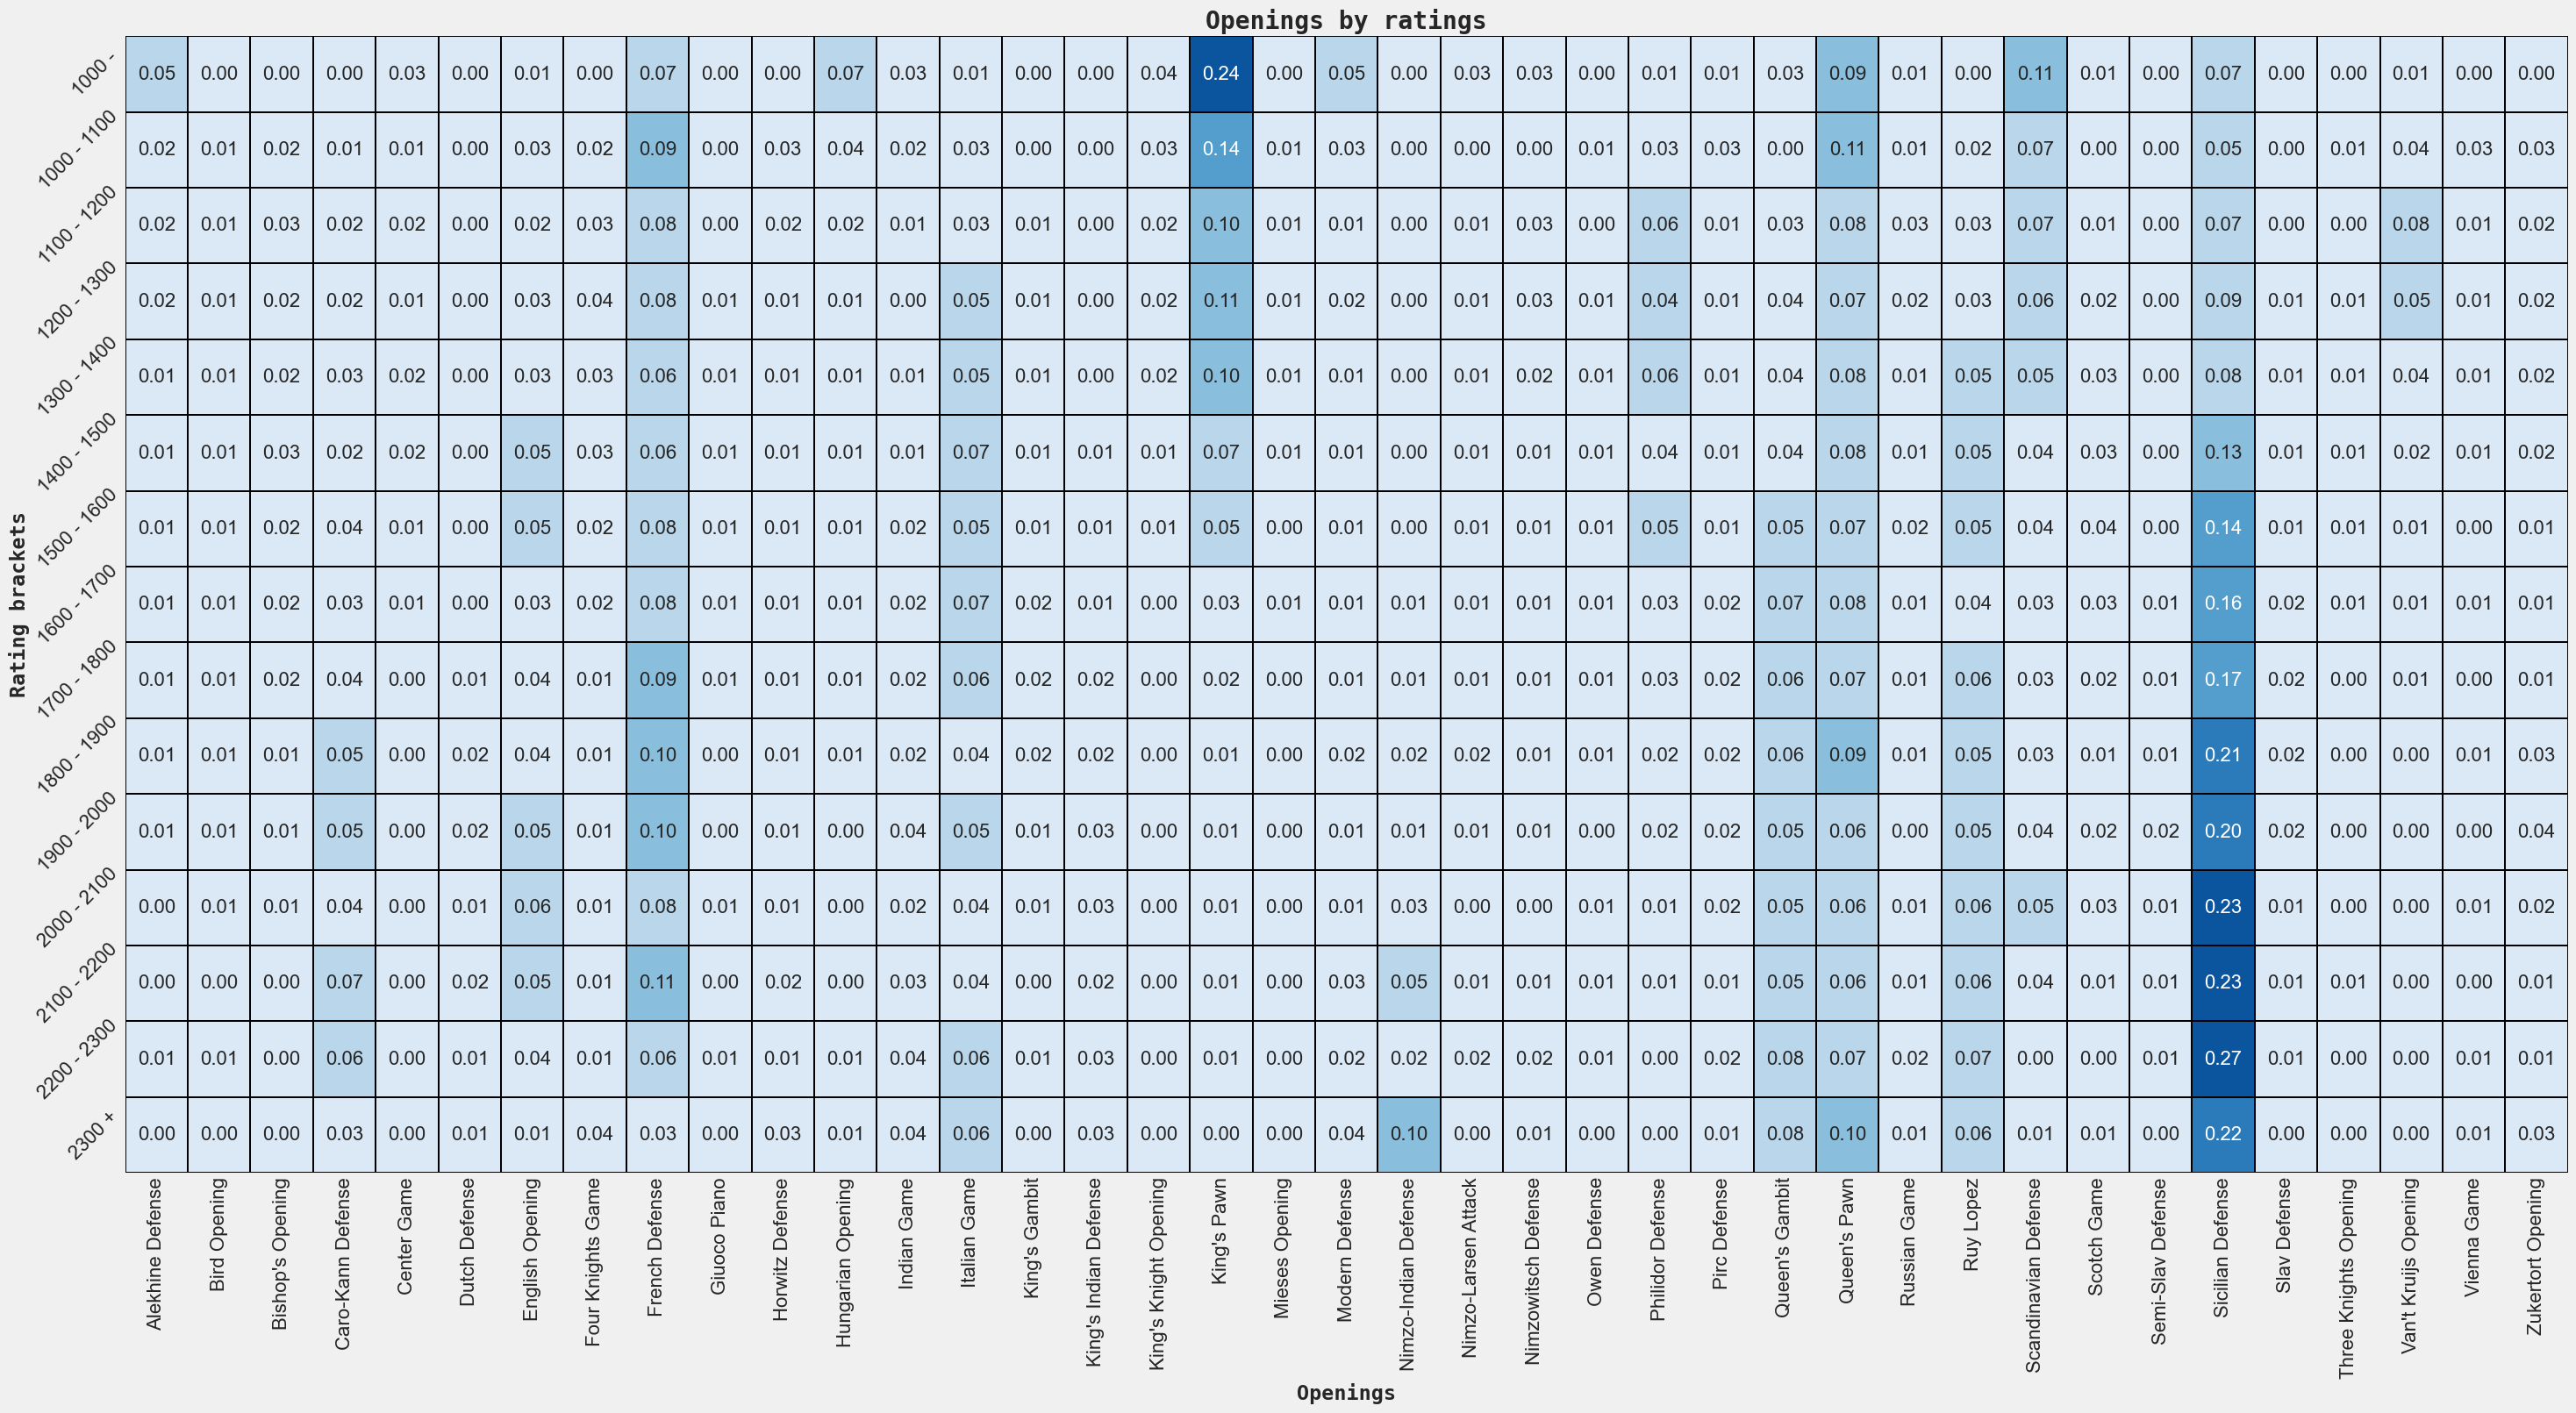

In [60]:

z = df2.groupby(["rating_bracket", "opening_name"]).size().unstack().fillna(0).astype(int)
fig, ax = plt.subplots(figsize=(32, 16))
colormap = sns.color_palette("Blues") 
sns.heatmap(z.apply(lambda x: x/x.sum(), axis=1), xticklabels=True, yticklabels=True, cmap=colormap,
        annot=True, linewidths=0.005, linecolor='black', annot_kws={"fontsize":16}, fmt='.2f', cbar=False)

plt.title('Openings by ratings', fontname = 'monospace', weight='bold')
plt.xticks(fontsize = 16)
plt.xlabel("Openings", fontname = 'monospace', weight='semibold')
plt.yticks(fontsize=16, rotation = 45)
plt.ylabel("Rating brackets", fontname = 'monospace', weight='semibold')
plt.show()
del z

In [39]:
df3 = df.groupby(["rating_bracket", "winner"]).size().unstack().astype(int)
df3 = df3.div(df3.sum(axis=1), axis=0).mul(100).round(2)

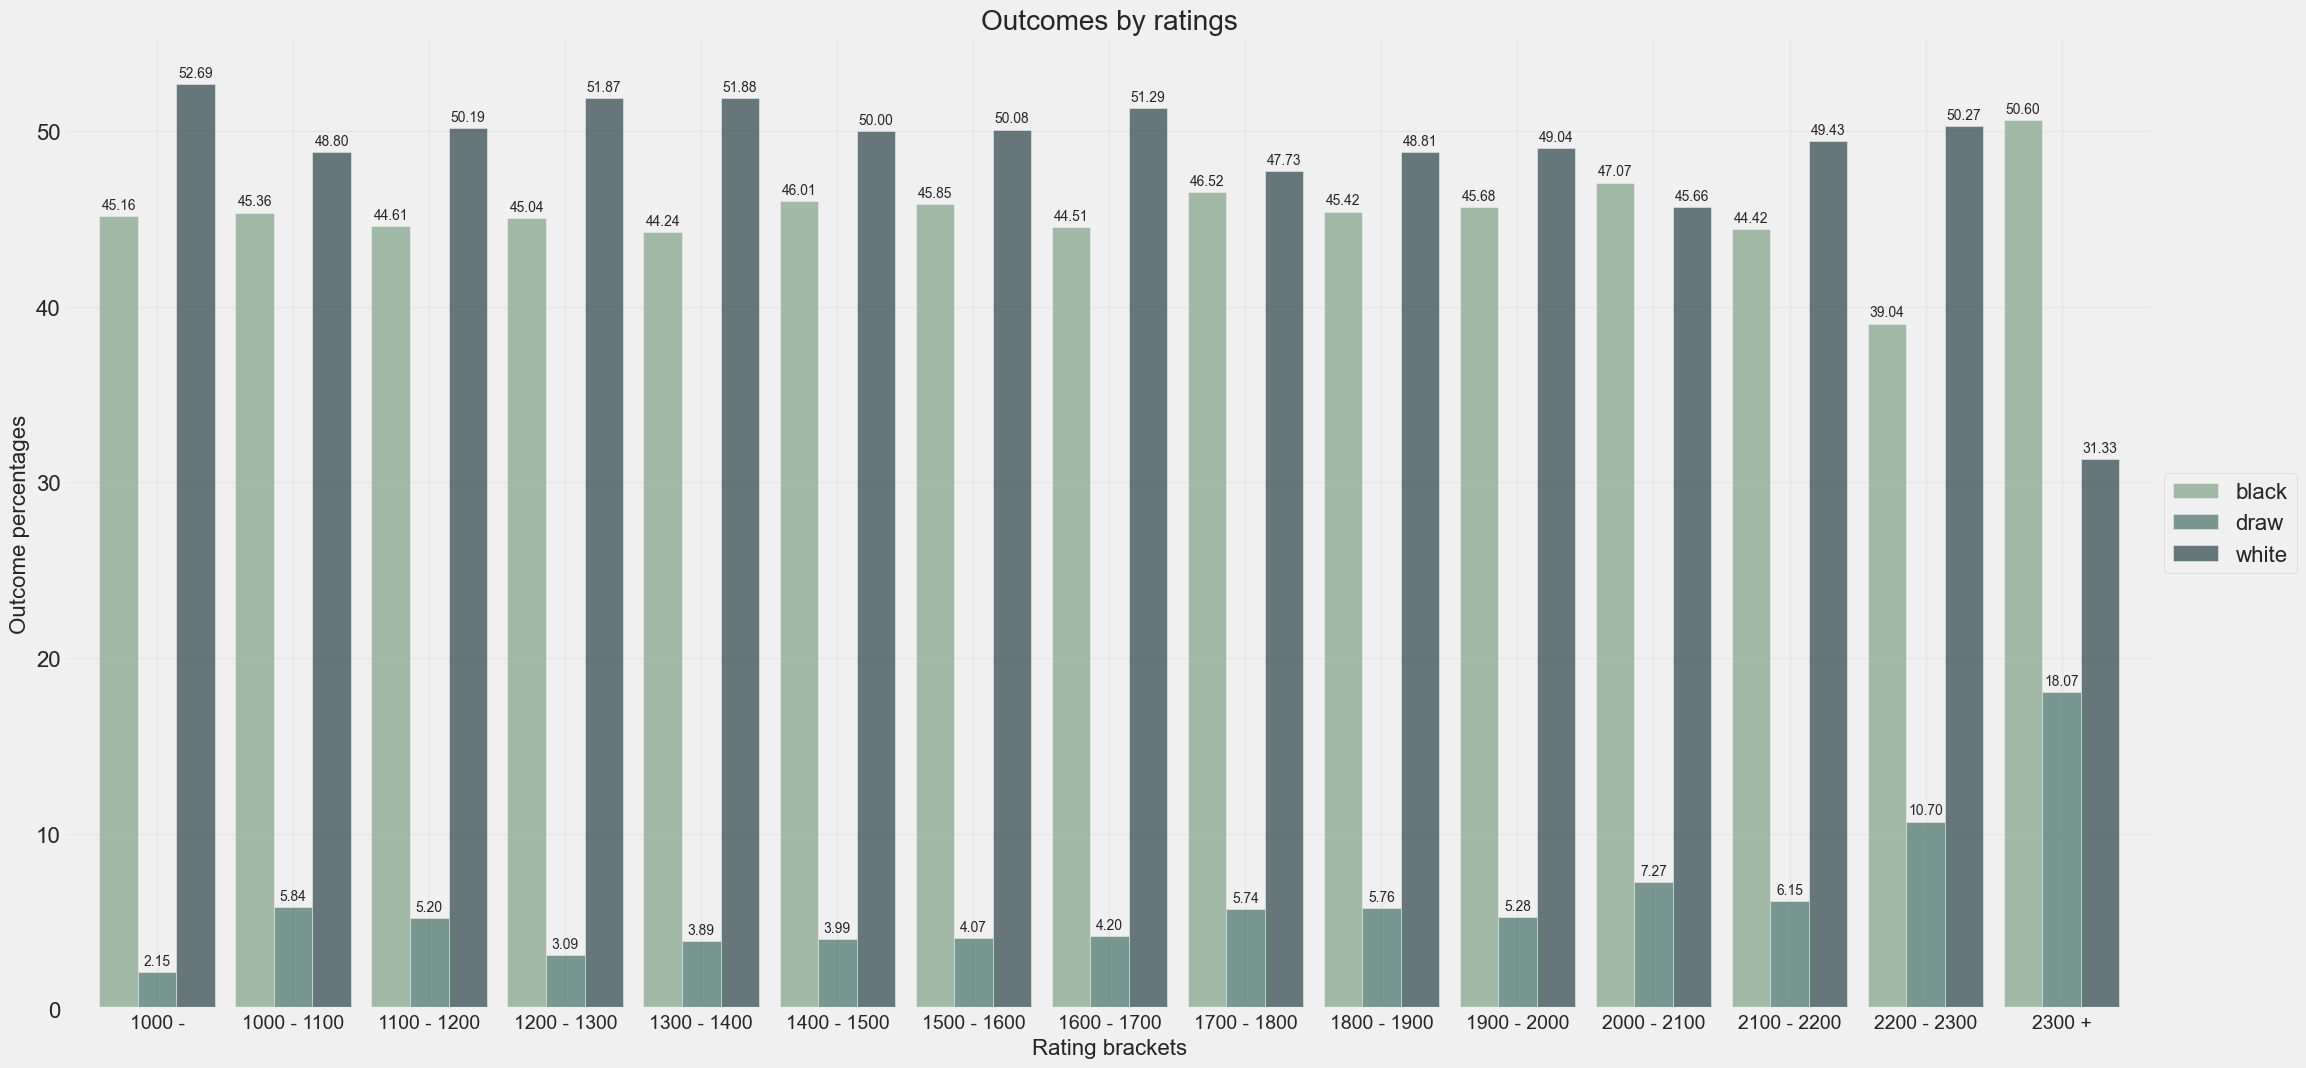

In [44]:
plots = df3.plot(kind = "bar", alpha=0.75, color = ['#85a98d','#507970','#374e54'], figsize = (24, 12),
    width = 0.85, title = "Outcomes by ratings",)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plots.grid(alpha = 0.25)    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.xlabel("Rating brackets", fontsize = 16)
plt.xticks(fontsize = 14, rotation = 0)
plt.ylabel("Outcome percentages", fontsize = 16)
plt.yticks(fontsize=16)
plt.show()

In [45]:
df2.groupby("opening_name")["turns"].mean().nlargest(39)

opening_name
King's Indian Defense    70.756345
Semi-Slav Defense        69.518519
Nimzo-Indian Defense     66.662420
Indian Game              65.673981
Modern Defense           65.320000
Caro-Kann Defense        64.613065
Slav Defense             64.183333
Queen's Pawn             63.502180
Ruy Lopez                63.393939
Hungarian Opening        63.212291
Nimzo-Larsen Attack      63.176829
Philidor Defense         63.037627
English Opening          62.840278
Sicilian Defense         62.786094
Queen's Gambit           62.348684
Vienna Game              61.868613
Four Knights Game        61.545946
French Defense           61.223796
Dutch Defense            60.720000
Pirc Defense             59.791667
Three Knights Opening    59.538462
Horwitz Defense          58.722488
Zukertort Opening        58.446429
Alekhine Defense         58.359375
Giuoco Piano             58.194444
Owen Defense             57.754386
Italian Game             57.477064
Nimzowitsch Defense      56.995536
King's 

In [46]:
df2.groupby("opening_name")["turns"].mean().nlargest(39).index

Index(['King's Indian Defense', 'Semi-Slav Defense', 'Nimzo-Indian Defense',
       'Indian Game', 'Modern Defense', 'Caro-Kann Defense', 'Slav Defense',
       'Queen's Pawn', 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       'Queen's Gambit', 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       'King's Gambit', 'Scandinavian Defense', 'Scotch Game',
       'Bishop's Opening', 'Van't Kruijs Opening', 'Russian Game',
       'Bird Opening', 'Center Game', 'King's Pawn', 'King's Knight Opening',
       'Mieses Opening'],
      dtype='object', name='opening_name')

In [47]:
df4 = df2.groupby(["winner", "opening_name"]).size().unstack().fillna(0).astype(int)
df4 = df4.div(df4.sum(axis=0), axis=1).mul(100).round(2).transpose()
df4 = df4.reindex(["King's Indian Defense", "Semi-Slav Defense", "Nimzo-Indian Defense",
       "Indian Game", "Modern Defense", 'Caro-Kann Defense', 'Slav Defense',
       "Queen's Pawn", 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       "Queen's Gambit", 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       "King's Gambit", 'Scandinavian Defense', 'Scotch Game',
       "Bishop's Opening", "Van't Kruijs Opening", 'Russian Game',
       'Bird Opening', 'Center Game', "King's Pawn", "King's Knight Opening",
       'Mieses Opening'])

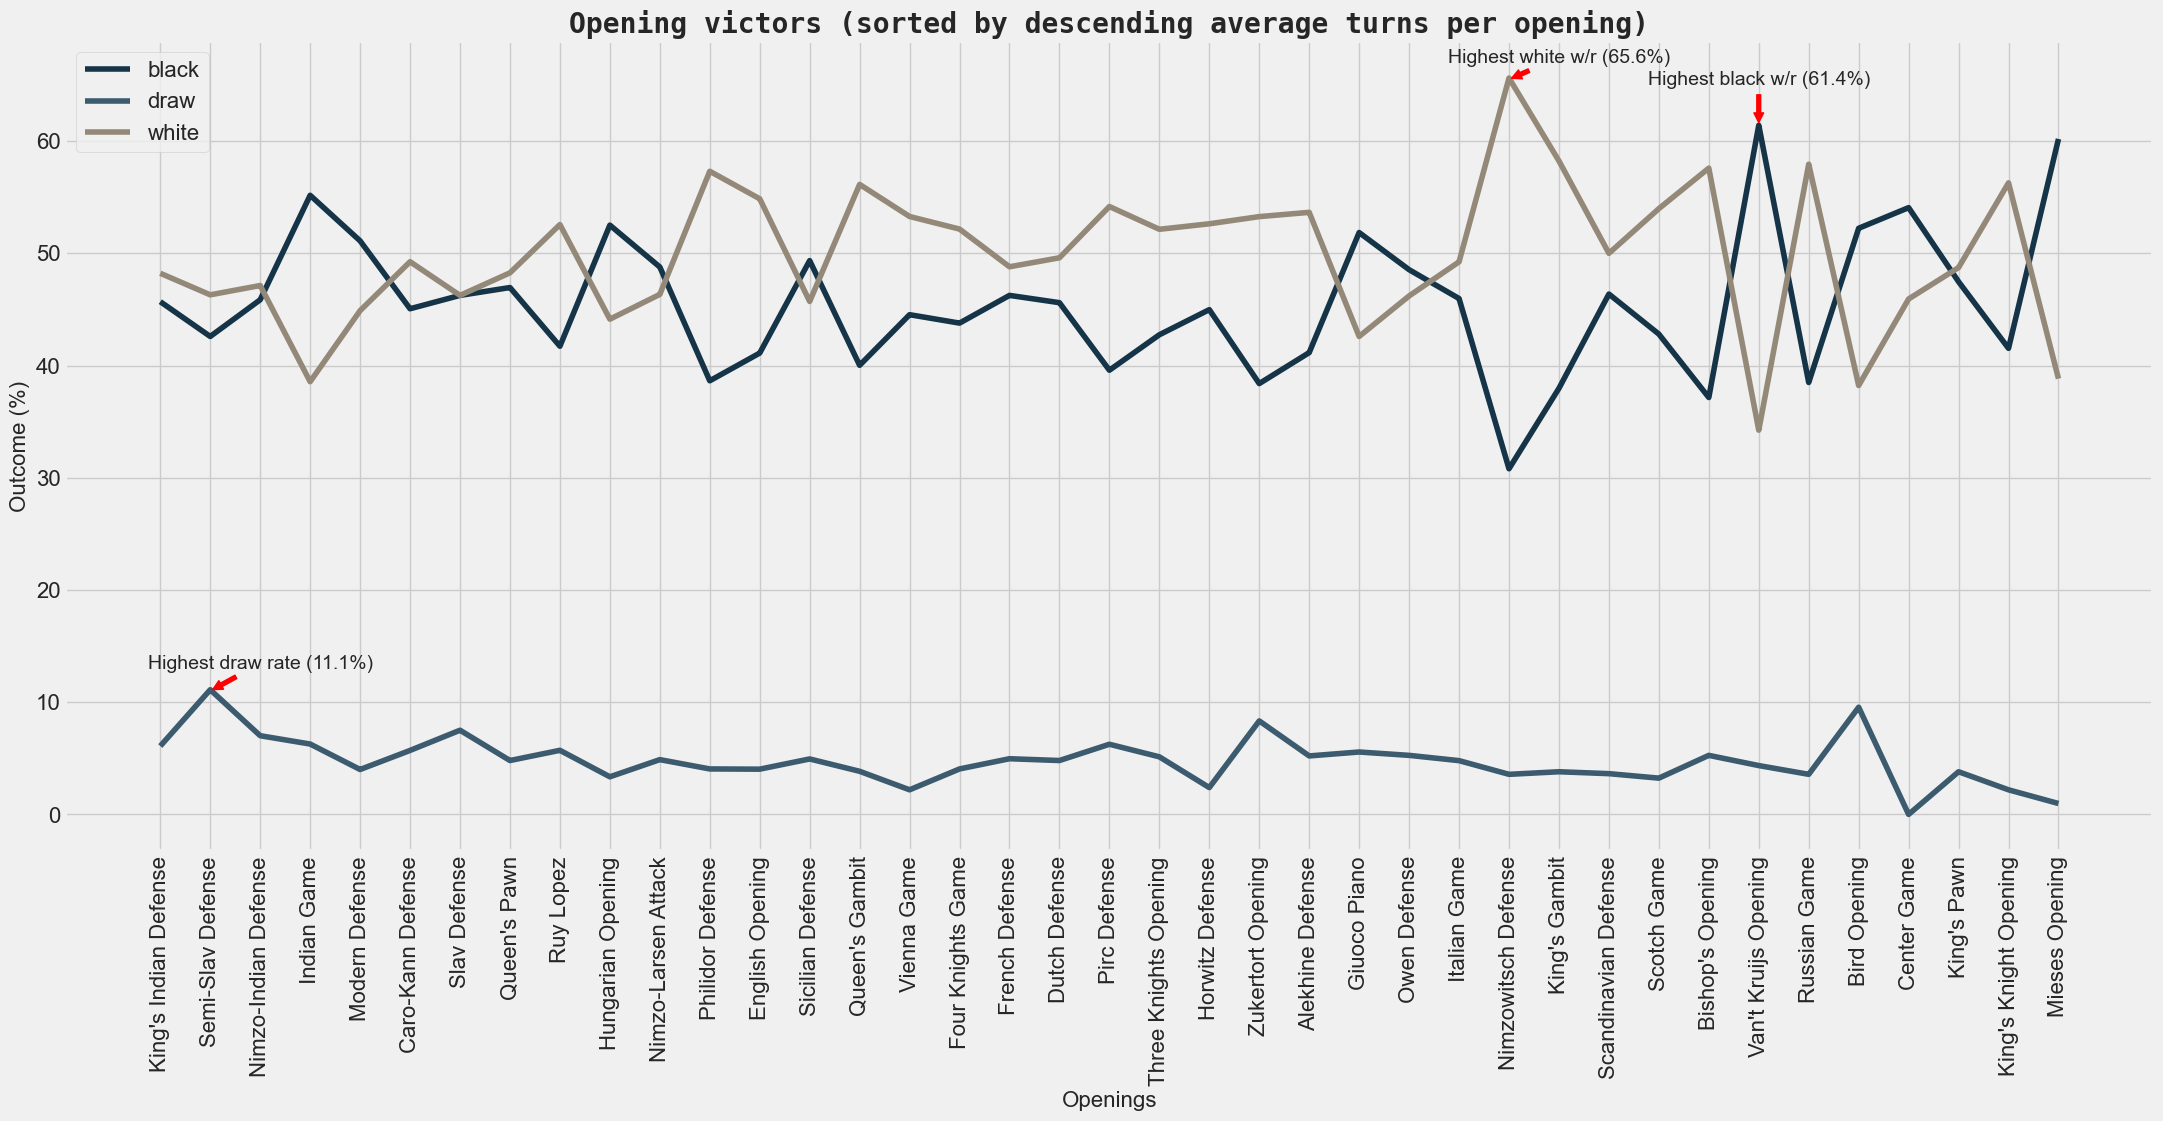

In [52]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data = df4, palette=['#153448','#3C5B6F','#948979'], dashes=[(1, 0), (1, 0), (1, 0)],
            sort = False)

plt.annotate("Highest draw rate (11.1%)", xy=(1,11), xytext=(2,13), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red') )
plt.annotate("Highest white w/r (65.6%)", xy=(27,65.5), xytext=(28,67), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red') )
plt.annotate("Highest black w/r (61.4%)", xy=(32,61.4), xytext=(32,65), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red') )

plt.title('Opening victors (sorted by descending average turns per opening)', 
          fontname = 'monospace', weight='bold')
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 90)
plt.ylabel("Outcome (%)", fontsize = 16)
plt.yticks(fontsize=16)

plt.show()

In [53]:
df2["victory_status"].value_counts()

victory_status
resign       10007
mate          5654
outoftime     1504
draw           804
Name: count, dtype: int64

In [54]:
df5 = df2.groupby(["victory_status", "opening_name"]).size().unstack().fillna(0).astype(int)
df5 = df5.div(df5.sum(axis=0), axis=1).mul(100).round(2).transpose()
df5 = df5.reindex(["King's Indian Defense", "Semi-Slav Defense", "Nimzo-Indian Defense",
       "Indian Game", "Modern Defense", 'Caro-Kann Defense', 'Slav Defense',
       "Queen's Pawn", 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       "Queen's Gambit", 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       "King's Gambit", 'Scandinavian Defense', 'Scotch Game',
       "Bishop's Opening", "Van't Kruijs Opening", 'Russian Game',
       'Bird Opening', 'Center Game', "King's Pawn", "King's Knight Opening",
       'Mieses Opening'])

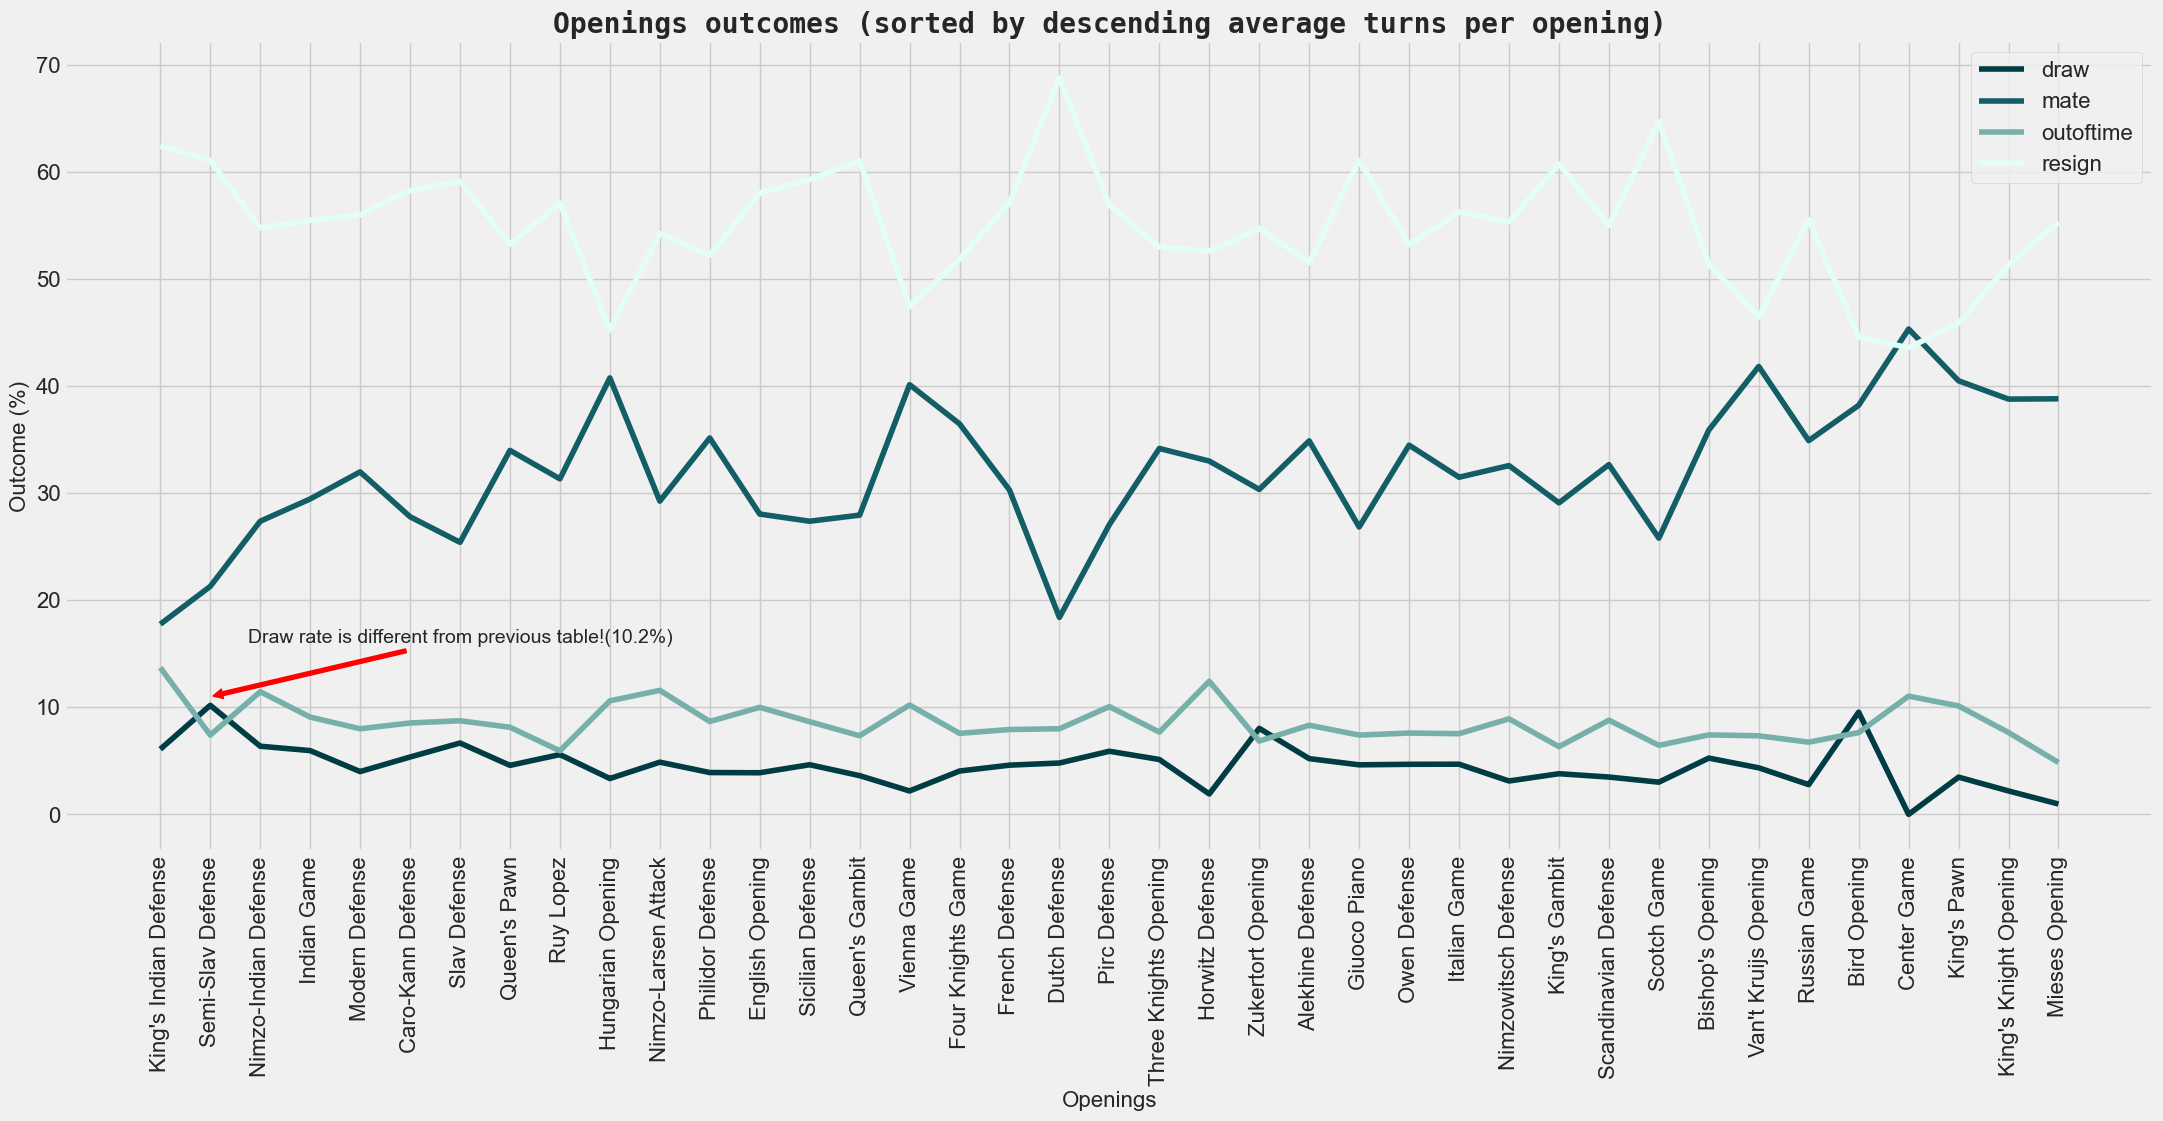

In [56]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data = df5, palette=['#003C43', "#135D66", '#77B0AA','#E3FEF7'], dashes=[(1, 0), (1, 0), (1, 0), (1, 0)],
            sort = False)

plt.annotate("Draw rate is different from previous table!(10.2%)", xy=(1,11), xytext=(6,16), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red') )

plt.title('Openings outcomes (sorted by descending average turns per opening)', 
          fontname = 'monospace', weight='bold')
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 90)
plt.ylabel("Outcome (%)", fontsize = 16)
plt.yticks(fontsize=16)

plt.show()


In [57]:
df2[(df2["winner"] == "draw") & (df2["victory_status"] != "draw")]
len(df2[(df2["winner"] == "draw") & (df2["victory_status"] != "draw")])

42